In [369]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import torchviz 

In [370]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [371]:
# scalar - 0D tensor
# vector - 1D tensor
# matrix - 2D tensor
# tensor - nD tensor

In [372]:
scalar = torch.tensor(2)
vector = torch.tensor([1, 2, 3])
matrix = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

print(scalar)
print(vector)
print(matrix)
print(matrix.view(3, 2))
print(tensor)

tensor(2)
tensor([1, 2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])


In [373]:
torch.manual_seed(33)

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

print(w,b)

tensor([1.1982], requires_grad=True) tensor([-0.3998], requires_grad=True)


In [374]:
LR = 0.1
N = 1000


In [375]:
indices = np.arange(N)
np.random.shuffle(indices)
train_indices = indices[:int(N*0.8)]
value_indices = indices[int(N*0.8):]

real_w = 2
real_b = 1

x = np.random.rand(N,1)
epsilon  = np.random.randn(N,1) * 0.1

y = real_w * x + real_b + epsilon

x_train = x[train_indices]
y_train = y[train_indices]

x_value = x[value_indices]
y_value = y[value_indices]


x_train_tensor = torch.as_tensor(x_train)
y_train_tensor = torch.as_tensor(y_train)

x_value_tensor = torch.as_tensor(x_value) 
y_value_tensor = torch.as_tensor(y_value) 


In [376]:

for n in range(N):
    y_model_tensor = w * y_train_tensor + b
    error = y_model_tensor - y_train_tensor
    loss = (error ** 2).mean()
    loss.backward()
    with torch.no_grad():
        w -= w.grad * LR
        b -= b.grad * LR
    
    w.grad.zero_()
    b.grad.zero_()
    print(w,b)



tensor([1.1848], requires_grad=True) tensor([-0.3997], requires_grad=True)
tensor([1.1831], requires_grad=True) tensor([-0.3942], requires_grad=True)
tensor([1.1807], requires_grad=True) tensor([-0.3891], requires_grad=True)
tensor([1.1783], requires_grad=True) tensor([-0.3840], requires_grad=True)
tensor([1.1760], requires_grad=True) tensor([-0.3790], requires_grad=True)
tensor([1.1738], requires_grad=True) tensor([-0.3741], requires_grad=True)
tensor([1.1715], requires_grad=True) tensor([-0.3693], requires_grad=True)
tensor([1.1693], requires_grad=True) tensor([-0.3645], requires_grad=True)
tensor([1.1671], requires_grad=True) tensor([-0.3598], requires_grad=True)
tensor([1.1649], requires_grad=True) tensor([-0.3551], requires_grad=True)
tensor([1.1628], requires_grad=True) tensor([-0.3505], requires_grad=True)
tensor([1.1607], requires_grad=True) tensor([-0.3459], requires_grad=True)
tensor([1.1586], requires_grad=True) tensor([-0.3415], requires_grad=True)
tensor([1.1565], requires

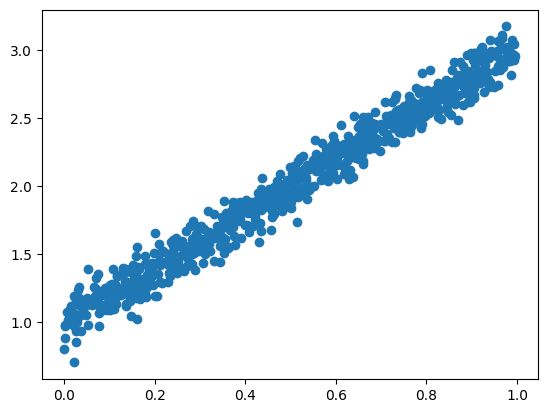

In [377]:
y_model_result = y_model_tensor.detach().numpy()
plt.scatter(x_train,y_model_result)

In [378]:
torchviz.make_dot(loss)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH